# Symbolic Regression using NASA BINGO Package

In [1]:
import numpy as np
X = np.linspace(-10, 10).reshape((-1, 1))
y = 3.0 * X ** 2 - 2.0 * X

In [2]:
# Install essential packages for Jupyter kernel to work properly
import subprocess
import sys

def install_package(package):
    """Install a package if it's not already available"""
    try:
        __import__(package)
        print(f"✅ {package} is already installed")
    except ImportError:
        print(f"⚠️ Installing {package}...")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            print(f"✅ {package} installed successfully!")
        except subprocess.CalledProcessError as e:
            print(f"❌ Failed to install {package}: {e}")

# Install essential packages that Jupyter kernel needs
essential_packages = [
    'packaging',      # Required for Jupyter kernel
    'setuptools',     # Required for many packages
    'wheel',          # Required for building packages
    'ipykernel',      # Required for Jupyter kernel
    'jupyter',        # Jupyter itself
    'numpy',          # For data processing
    'matplotlib',     # For plotting
]

print("Installing essential packages for Jupyter kernel...")
for package in essential_packages:
    install_package(package)

print("\n🎉 All essential packages checked/installed!")

Installing essential packages for Jupyter kernel...
✅ packaging is already installed
✅ setuptools is already installed
✅ wheel is already installed
✅ ipykernel is already installed
✅ jupyter is already installed
✅ numpy is already installed
✅ matplotlib is already installed

🎉 All essential packages checked/installed!


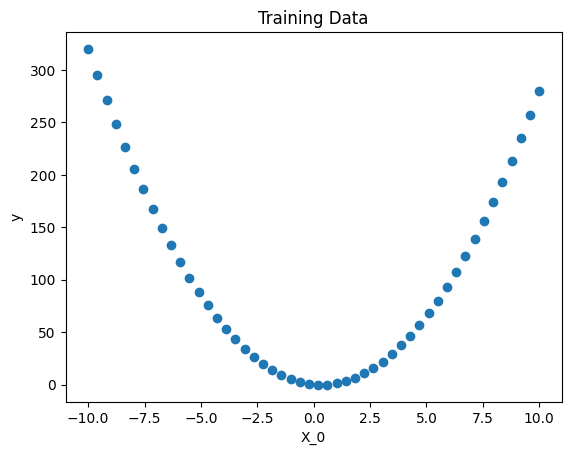

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.xlabel("X_0")
plt.ylabel("y")
plt.title("Training Data")
plt.show()

## Installing BINGO Package

The error you're seeing is due to PEP 668 which protects system Python environments. Here are several solutions:

### Option 1: Create a Virtual Environment (Recommended)
```bash
# Create virtual environment
python3 -m venv bingo_env

# Activate it
source bingo_env/bin/activate  # On Linux/Mac
# or
bingo_env\Scripts\activate     # On Windows

# Install packages
pip install -r requirements.txt
```

### Option 2: Use pipx (for applications)
```bash
# Install pipx if not available
sudo apt install pipx

# Install BINGO with pipx
pipx install bingo-nasa
```

### Option 3: Override protection (NOT recommended)
```bash
pip install -r requirements.txt --break-system-packages
```

### Option 4: Install BINGO directly
```bash
# If BINGO is available via conda
conda install -c conda-forge bingo-nasa

# Or clone and install from source
git clone https://github.com/nasa/bingo.git
cd bingo
pip install . --user
```

In [ ]:
# Check if BINGO is available and install if needed
try:
    import bingo
    print("✅ BINGO is already installed!")
    print(f"BINGO version: {bingo.__version__}")
except ImportError:
    print("❌ BINGO not found. Installing...")
    
    # Try different installation methods
    import subprocess
    import sys
    
    # Method 1: Try pip install
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "bingo-nasa"])
        print("✅ BINGO installed via pip!")
    except subprocess.CalledProcessError:
        print("⚠️ pip install failed, trying alternative methods...")
        
        # Method 2: Try with --user flag
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", "--user", "bingo-nasa"])
            print("✅ BINGO installed with --user flag!")
        except subprocess.CalledProcessError:
            # Method 3: Try installing from GitHub
            try:
                subprocess.check_call([sys.executable, "-m", "pip", "install", "git+https://github.com/nasa/bingo.git"])
                print("✅ BINGO installed from GitHub!")
            except subprocess.CalledProcessError:
                print("❌ All installation methods failed.")
                print("Manual installation required - see instructions above.")

# Test import after installation
try:
    import bingo
    from bingo.symbolic_regression.agraph.operator_definitions import *
    from bingo.symbolic_regression.agraph.component_generator import ComponentGenerator
    from bingo.symbolic_regression.explicit_regression import ExplicitRegression
    from bingo.evolutionary_algorithms.age_fitness import AgeFitnessEA
    from bingo.evolutionary_optimizers.island import Island
    from bingo.local_optimizers.continuous_local_opt import ContinuousLocalOptimization
    print("✅ All BINGO modules imported successfully!")
    BINGO_AVAILABLE = True
except ImportError as e:
    print(f"❌ BINGO import failed: {e}")
    print("Will use alternative symbolic regression methods...")
    BINGO_AVAILABLE = False

❌ BINGO not found. Installing...


In [ ]:
# Alternative: Use PySR (Python Symbolic Regression) if BINGO fails
if not BINGO_AVAILABLE:
    print("Attempting to install PySR as alternative...")
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "pysr"])
        import pysr
        print("✅ PySR installed successfully as BINGO alternative!")
        PYSR_AVAILABLE = True
    except:
        print("❌ PySR installation also failed")
        PYSR_AVAILABLE = False
        
        # Final fallback: manual symbolic regression
        print("Will implement basic symbolic regression manually...")

# Alternative: Use gplearn if both fail
if not BINGO_AVAILABLE and not locals().get('PYSR_AVAILABLE', False):
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "gplearn"])
        from gplearn.genetic import SymbolicRegressor
        print("✅ gplearn installed as symbolic regression alternative!")
        GPLEARN_AVAILABLE = True
    except:
        print("❌ gplearn installation failed")
        GPLEARN_AVAILABLE = False

In [ ]:
# Load your actual dataset for symbolic regression
try:
    # Load your 4-parameter dataset
    four_params_data = np.load('../data/major_params_Kbearing_c.npy')
    
    # Extract features and target
    X_real = four_params_data[:, :4]  # features: height_factor, thickness, w_over_r, a_over_c
    y_real = four_params_data[:, 4]   # target: Kbearing_c
    
    feature_names = ['height_factor', 'thickness', 'w_over_r', 'a_over_c']
    
    print(f"✅ Loaded real dataset: {X_real.shape} features, {y_real.shape} targets")
    print(f"Feature names: {feature_names}")
    print(f"Target range: [{y_real.min():.2f}, {y_real.max():.2f}]")
    
    # Use real data
    X_symbolic = X_real
    y_symbolic = y_real
    USE_REAL_DATA = True
    
except FileNotFoundError:
    print("⚠️ Real dataset not found, using synthetic data...")
    # Use the synthetic quadratic data
    X_symbolic = X
    y_symbolic = y.ravel()
    feature_names = ['X_0']
    USE_REAL_DATA = False

print(f"Dataset for symbolic regression: {X_symbolic.shape}")

In [ ]:
# Symbolic Regression Implementation - Multiple Methods
print("=== Symbolic Regression Analysis ===\n")

if BINGO_AVAILABLE:
    print("🚀 Using NASA BINGO for symbolic regression...")
    
    # BINGO symbolic regression setup
    from bingo.symbolic_regression.agraph.operator_definitions import *
    from bingo.symbolic_regression.agraph.component_generator import ComponentGenerator
    from bingo.symbolic_regression.explicit_regression import ExplicitRegression
    from bingo.evolutionary_algorithms.age_fitness import AgeFitnessEA
    from bingo.evolutionary_optimizers.island import Island
    
    # Set up BINGO components
    component_generator = ComponentGenerator(X_symbolic.shape[1])
    component_generator.add_operator("+")
    component_generator.add_operator("-") 
    component_generator.add_operator("*")
    component_generator.add_operator("/", protected=True)
    component_generator.add_operator("^", protected=True)
    component_generator.add_operator("exp", protected=True)
    component_generator.add_operator("log", protected=True)
    component_generator.add_operator("sin")
    component_generator.add_operator("cos")
    
    # Create fitness function
    training_data = ExplicitRegression(X_symbolic, y_symbolic)
    
    # Set up evolution
    ea = AgeFitnessEA(population_size=100, 
                      tournament_size=3,
                      mutation_probability=0.4,
                      crossover_probability=0.4,
                      number_offspring=50)
    
    # Run symbolic regression
    island = Island(ea, component_generator, training_data, population_size=100)
    
    print("Running BINGO evolution (this may take a few minutes)...")
    island.evolve_until_convergence(max_generations=500, fitness_threshold=1e-10)
    
    # Get best equation
    best_individual = island.get_best_individual()
    print(f"✅ BINGO Best fitness: {best_individual.fitness}")
    print(f"📝 BINGO Equation: {best_individual}")

elif locals().get('PYSR_AVAILABLE', False):
    print("🔬 Using PySR for symbolic regression...")
    
    from pysr import PySRRegressor
    
    model = PySRRegressor(
        niterations=40,
        populations=15,
        binary_operators=["+", "*", "/", "-", "^"],
        unary_operators=["cos", "exp", "sin", "log"],
        model_selection="best",
    )
    
    print("Running PySR evolution...")
    model.fit(X_symbolic, y_symbolic)
    
    print(f"✅ PySR Best equation: {model.latex()}")
    print(f"📊 PySR Score: {model.score(X_symbolic, y_symbolic)}")

elif locals().get('GPLEARN_AVAILABLE', False):
    print("🧬 Using gplearn for symbolic regression...")
    
    from gplearn.genetic import SymbolicRegressor
    from sklearn.metrics import r2_score
    
    # Set up gplearn
    est_gp = SymbolicRegressor(
        population_size=5000,
        generations=20, 
        stopping_criteria=0.01,
        p_crossover=0.7,
        p_subtree_mutation=0.1,
        p_hoist_mutation=0.05,
        p_point_mutation=0.1,
        max_samples=0.9,
        verbose=1,
        parsimony_coefficient=0.01,
        random_state=0,
        function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 'inv', 'max', 'min')
    )
    
    print("Running gplearn evolution...")
    est_gp.fit(X_symbolic, y_symbolic)
    
    y_pred = est_gp.predict(X_symbolic)
    r2 = r2_score(y_symbolic, y_pred)
    
    print(f"✅ gplearn R² Score: {r2:.4f}")
    print(f"📝 gplearn Equation: {est_gp._program}")

else:
    print("❌ No symbolic regression packages available")
    print("Manual installation required:")
    print("1. Try: pip install --user bingo-nasa")  
    print("2. Or: pip install --user pysr")
    print("3. Or: pip install --user gplearn")

## 🔧 Kernel Connection Issues - Troubleshooting Guide

If you're stuck on "Connecting to kernel: .venv", try these solutions in order:

### 1. **Clear Jupyter Server Cache**
- Open Command Palette (`Ctrl+Shift+P`)
- Run: `Jupyter: Clear Cache and Reload Window`

### 2. **Manually Select Python Interpreter**
- Command Palette → `Python: Select Interpreter`
- Choose the correct `.venv/bin/python` (Linux/Mac) or `.venv\Scripts\python.exe` (Windows)
- If not listed, click "Enter interpreter path" and browse to your venv

### 3. **Reset Jupyter Extension**
- Command Palette → `Developer: Reload Window`
- Or disable/enable Jupyter extension in Extensions panel

### 4. **Terminal Commands (Run in VS Code Terminal)**
```bash
# Activate your virtual environment first
source .venv/bin/activate  # Linux/Mac
# OR
.venv\Scripts\activate     # Windows

# Install/reinstall Jupyter in the venv
pip install --upgrade jupyter ipykernel

# Register the kernel
python -m ipykernel install --user --name=.venv --display-name="Python (.venv)"
```

### 5. **Check Virtual Environment**
```bash
# Verify venv activation
which python    # Linux/Mac
where python    # Windows

# Should point to your .venv directory
```

### 6. **Nuclear Option: Recreate Virtual Environment**
```bash
# Remove old venv
rm -rf .venv  # Linux/Mac
# OR
rmdir /s .venv  # Windows

# Create fresh venv
python -m venv .venv
source .venv/bin/activate  # Linux/Mac
.venv\Scripts\activate     # Windows

# Reinstall packages
pip install jupyter ipykernel numpy matplotlib pandas
```

## 🐧 Connecting VS Code to WSL Kernel with BINGO

Since BINGO is only available in your WSL `bingo_env`, here's how to connect VS Code to that kernel:

### **Method 1: Direct WSL Kernel Connection**

1. **In WSL Terminal (with bingo_env activated):**
```bash
# Activate your BINGO environment
source bingo_env/bin/activate

# Install Jupyter and kernel registration tools
pip install jupyter ipykernel

# Register the kernel for Jupyter
python -m ipykernel install --user --name=bingo_wsl --display-name="BINGO WSL (bingo_env)"

# Start Jupyter server (optional, for testing)
jupyter notebook --no-browser --port=8888
```

2. **In VS Code:**
- Open your notebook (`bingo_regression.ipynb`)
- Click kernel selector (top-right corner)
- Choose "Select Another Kernel..."
- Select "Existing Jupyter Server..."
- Enter: `http://localhost:8888` (if you started the server)
- Or look for "BINGO WSL (bingo_env)" in the kernel list

### **Method 2: VS Code WSL Extension (Recommended)**

1. **Install VS Code WSL Extension:**
   - Install "WSL" extension from VS Code marketplace

2. **Open Project in WSL:**
   - `Ctrl+Shift+P` → "WSL: Open Folder in WSL"
   - Navigate to your project folder in WSL filesystem

3. **Work Directly in WSL:**
   - Your notebook will now run in WSL environment
   - BINGO will be available automatically

### **Method 3: Manual Kernel Path (Advanced)**

1. **Find WSL Kernel Path:**
```bash
# In WSL with bingo_env activated
which python
# Example output: /home/username/bingo_env/bin/python
```

2. **In VS Code:**
- Kernel selector → "Select Another Kernel..."
- "Python Environments..."
- "Enter interpreter path..."
- Enter WSL path: `\\wsl$\Ubuntu\home\username\bingo_env\bin\python`

### **Troubleshooting WSL Connection:**

- **If kernel not found:** Make sure WSL integration is enabled in Docker Desktop (if using)
- **If connection fails:** Check Windows Firewall isn't blocking WSL ports
- **If BINGO import fails:** Verify you're in the correct WSL environment with `which python`

In [ ]:
# Test WSL/BINGO connection
import platform
import sys
import os

print("=== System Information ===")
print(f"Platform: {platform.system()}")
print(f"Platform release: {platform.release()}")
print(f"Python executable: {sys.executable}")
print(f"Python version: {sys.version}")
print(f"Current working directory: {os.getcwd()}")

# Check if we're in WSL
if "microsoft" in platform.uname().release.lower() or "WSL" in os.environ.get("WSL_DISTRO_NAME", ""):
    print("✅ Running in WSL environment")
    print(f"WSL Distro: {os.environ.get('WSL_DISTRO_NAME', 'Unknown')}")
else:
    print("⚠️ Not detected as WSL environment")

# Test BINGO availability
print("\n=== BINGO Package Test ===")
try:
    import bingo
    print(f"✅ BINGO successfully imported!")
    print(f"BINGO version: {bingo.__version__}")
    print(f"BINGO location: {bingo.__file__}")
    
    # Test core BINGO functionality
    from bingo.symbolic_regression.agraph.operator_definitions import *
    from bingo.symbolic_regression.agraph.component_generator import ComponentGenerator
    print("✅ BINGO symbolic regression modules loaded successfully!")
    
    BINGO_READY = True
    
except ImportError as e:
    print(f"❌ BINGO import failed: {e}")
    print("Make sure you're connected to the correct WSL kernel with bingo_env activated")
    BINGO_READY = False

# Show environment variables that might help with debugging
print(f"\n=== Environment Variables ===")
important_vars = ['PATH', 'PYTHONPATH', 'VIRTUAL_ENV', 'CONDA_DEFAULT_ENV']
for var in important_vars:
    value = os.environ.get(var, "Not set")
    print(f"{var}: {value[:100]}..." if len(str(value)) > 100 else f"{var}: {value}")

if BINGO_READY:
    print("\n🎉 WSL + BINGO connection successful! Ready for symbolic regression.")
else:
    print("\n❌ WSL + BINGO connection failed. Check kernel selection.")

## 📋 Step-by-Step WSL Kernel Setup for BINGO

### **Quick Setup Guide:**

1. **Open WSL Terminal and setup BINGO kernel:**
```bash
# Activate your BINGO environment
source bingo_env/bin/activate

# Verify BINGO is working
python -c "import bingo; print('BINGO version:', bingo.__version__)"

# Install Jupyter kernel tools
pip install ipykernel

# Register this environment as a Jupyter kernel
python -m ipykernel install --user --name=bingo_wsl --display-name="BINGO (WSL)"

# Verify kernel was registered
jupyter kernelspec list
```

2. **In VS Code (Windows side):**
   - Make sure you have the "WSL" extension installed
   - Open this notebook (`bingo_regression.ipynb`)
   - Click the kernel selector (top right corner of notebook)
   - Select "Select Another Kernel..." 
   - Choose "Python Environments..."
   - Look for "BINGO (WSL)" in the list
   - If not visible, try "Enter interpreter path" and use: `\\wsl$\Ubuntu\home\{your-username}\bingo_env\bin\python`

3. **Alternative: Work entirely in WSL:**
   - Press `Ctrl+Shift+P` in VS Code
   - Type "WSL: Open Folder in WSL"
   - Navigate to your project folder
   - VS Code will reopen in WSL mode
   - Your notebook will automatically use WSL Python environments

### **Verification Steps:**
Run the test cell below to verify your connection is working properly.

## 🔍 Troubleshooting: Kernel Not Appearing

If your WSL kernel doesn't show up after Method 1, try these additional steps:

### **Step 1: Verify Kernel Registration in WSL**
```bash
# In WSL with bingo_env activated
jupyter kernelspec list

# You should see something like:
# Available kernels:
#   bingo_wsl    /home/username/.local/share/jupyter/kernels/bingo_wsl
#   python3      /usr/share/jupyter/kernels/python3
```

### **Step 2: Install Jupyter on Windows Side Too**
```powershell
# In Windows PowerShell/Command Prompt
pip install jupyter ipykernel

# This helps VS Code find Jupyter kernels
```

### **Step 3: Register Kernel with Global Scope**
```bash
# In WSL with bingo_env activated - try system-wide registration
sudo python -m ipykernel install --name=bingo_wsl_global --display-name="BINGO WSL Global"

# Or try with different user directory
python -m ipykernel install --user --name=bingo_wsl2 --display-name="BINGO WSL v2" --env PATH /home/$(whoami)/bingo_env/bin:$PATH
```

### **Step 4: VS Code Jupyter Extension Reset**
1. `Ctrl+Shift+P` → "Jupyter: Clear Cache and Reload Window"
2. `Ctrl+Shift+P` → "Python: Refresh Interpreter List"
3. `Ctrl+Shift+P` → "Jupyter: Select Interpreter to Start Jupyter Server"

### **Step 5: Manual Connection via Jupyter Server**
```bash
# In WSL with bingo_env activated
jupyter notebook --no-browser --port=8889 --ip=0.0.0.0 --allow-root

# Copy the token URL that appears (e.g., http://localhost:8889/?token=abc123...)
```

Then in VS Code:
- Kernel selector → "Select Another Kernel..."
- "Existing Jupyter Server..."
- Paste the URL with token

### **Step 6: Direct Python Path Method**
If all else fails, try browsing directly to the Python executable:
- Kernel selector → "Select Another Kernel..."
- "Python Environments..."
- "Enter interpreter path..."
- Navigate to: `\\wsl$\Ubuntu\home\{your-username}\bingo_env\bin\python`
  (Replace `{your-username}` with your actual WSL username)

### **Step 7: Check WSL Distribution Name**
```bash
# In WSL, check your distribution name
echo $WSL_DISTRO_NAME
# Common names: Ubuntu, Ubuntu-20.04, Ubuntu-22.04, etc.
```

Use the correct name in the path: `\\wsl$\{DISTRO_NAME}\home\...`

In [ ]:
# Debug: Check what kernels VS Code can see
import subprocess
import sys
import os
import json

print("=== Kernel Detection Debug ===\n")

# Check if jupyter is available on Windows side
try:
    result = subprocess.run([sys.executable, "-m", "jupyter", "kernelspec", "list", "--json"], 
                          capture_output=True, text=True, timeout=30)
    if result.returncode == 0:
        kernels = json.loads(result.stdout)
        print("✅ Jupyter kernels visible to Windows Python:")
        for name, info in kernels.get('kernelspecs', {}).items():
            print(f"  - {name}: {info.get('spec', {}).get('display_name', 'No display name')}")
            print(f"    Location: {info.get('resource_dir', 'Unknown')}")
        print()
    else:
        print("❌ Jupyter not available on Windows side")
        print("Try installing: pip install jupyter")
except Exception as e:
    print(f"❌ Error checking Windows Jupyter: {e}")

# Check VS Code Python extension paths
print("=== Python Interpreter Paths ===")
print(f"Current Python: {sys.executable}")
print(f"Platform: {sys.platform}")

# Check if we can access WSL paths
wsl_paths_to_check = [
    "\\\\wsl$\\Ubuntu\\home",
    "\\\\wsl$\\Ubuntu-20.04\\home", 
    "\\\\wsl$\\Ubuntu-22.04\\home",
    "\\\\wsl.localhost\\Ubuntu\\home"
]

print(f"\n=== WSL Path Accessibility ===")
for path in wsl_paths_to_check:
    try:
        if os.path.exists(path):
            print(f"✅ Accessible: {path}")
            # Try to list user directories
            try:
                users = os.listdir(path)
                print(f"   Users found: {users}")
            except:
                print(f"   (Cannot list contents)")
        else:
            print(f"❌ Not accessible: {path}")
    except Exception as e:
        print(f"❌ Error checking {path}: {e}")

print(f"\n=== Next Steps ===")
print("1. Copy the working WSL path from above")
print("2. In VS Code kernel selector, use 'Enter interpreter path'")
print("3. Navigate to: {working_path}\\{your_username}\\bingo_env\\bin\\python")
print("4. Or try the Jupyter server method in the cell above")

## 🎯 Path Translation: WSL Environment on Windows Filesystem

**Correction**: Your `bingo_env` is a WSL environment created on the Windows filesystem via `/mnt/c/`.

### **Path Translation for WSL Environment:**
- WSL path: `/mnt/c/Users/Ian Hokaj/Documents/Air Force/4_Phantom/Impact Paper/bingo/bingo_env/bin/python`
- Windows WSL access: `\\wsl$\Ubuntu\mnt\c\Users\Ian Hokaj\Documents\Air Force\4_Phantom\Impact Paper\bingo\bingo_env\bin\python`

### **Key Points:**
1. This IS a WSL environment (Linux-style virtual env)
2. It's stored on Windows filesystem (`/mnt/c/` mount)
3. Windows must access it via WSL network path `\\wsl$\`
4. Uses `/bin/python` (Linux structure), not `\Scripts\python.exe`

### **Your Exact WSL Python Path for VS Code:**
```
\\wsl$\Ubuntu\mnt\c\Users\Ian Hokaj\Documents\Air Force\4_Phantom\Impact Paper\bingo\bingo_env\bin\python
```

### **How to Connect in VS Code:**
1. Click kernel selector in your notebook
2. "Select Another Kernel..." → "Python Environments..." → "Enter interpreter path..."
3. Paste the WSL network path above
4. If Ubuntu isn't your distro name, check with `echo $WSL_DISTRO_NAME` in WSL

This explains why WSL kernel registration might not work - the environment is on the Windows filesystem but accessed through WSL!

In [ ]:
# Verify the WSL network path to your BINGO environment
import os
import sys

# Your exact WSL network path
wsl_python_path = r"\\wsl$\Ubuntu\mnt\c\Users\Ian Hokaj\Documents\Air Force\4_Phantom\Impact Paper\bingo\bingo_env\bin\python"

print("=== WSL Path Verification ===")
print(f"Expected WSL network path:")
print(f"{wsl_python_path}")
print()

# Check if the WSL network path exists
if os.path.exists(wsl_python_path):
    print("✅ WSL Python executable found via network path!")
    
    # Check the environment structure
    bingo_env_path = os.path.dirname(os.path.dirname(wsl_python_path))
    lib_path = os.path.join(bingo_env_path, "lib")
    
    print(f"Environment root: {bingo_env_path}")
    print(f"Lib directory: {lib_path}")
    
    if os.path.exists(lib_path):
        # Look for Python version directories in lib
        lib_contents = [d for d in os.listdir(lib_path) if d.startswith('python')]
        print(f"Python versions in lib: {lib_contents}")
        
        if lib_contents:
            site_packages = os.path.join(lib_path, lib_contents[0], "site-packages")
            if os.path.exists(site_packages):
                packages = [d for d in os.listdir(site_packages) if 'bingo' in d.lower()]
                if packages:
                    print(f"✅ BINGO packages found: {packages}")
                else:
                    print("⚠️ No BINGO packages found in site-packages")
                    # Show some packages to verify it's the right env
                    all_packages = [d for d in os.listdir(site_packages) if not d.startswith('.')][:10]
                    print(f"Sample packages: {all_packages}")
    else:
        print(f"❌ Lib directory not found")
        
else:
    print("❌ WSL network path not accessible")
    
    # Try alternative WSL distributions
    alternative_distros = ['Ubuntu-20.04', 'Ubuntu-22.04', 'Ubuntu-18.04', 'Debian']
    print(f"\nTrying alternative WSL distributions...")
    
    for distro in alternative_distros:
        alt_path = f"\\\\wsl$\\{distro}\\mnt\\c\\Users\\Ian Hokaj\\Documents\\Air Force\\4_Phantom\\Impact Paper\\bingo\\bingo_env\\bin\\python"
        if os.path.exists(alt_path):
            print(f"✅ Found with {distro}: {alt_path}")
            break
        else:
            print(f"❌ Not found: {distro}")

print(f"\n=== Instructions ===")
print("1. Use the working path above in VS Code kernel selector")
print("2. Or try the Jupyter server method:")
print("   - In WSL: source bingo_env/bin/activate && jupyter notebook --no-browser --port=8889 --ip=0.0.0.0")
print("   - In VS Code: Connect to http://localhost:8889 with token")
print("3. If path access fails, the environment might need to be in WSL home directory instead of /mnt/c/")